In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/case_study_1/diabetic_data.csv')
print(data.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [ ]:
# Creating the target variable to solve the binary classification

new_target = data['readmitted'].replace('>30','NO')
new_target.unique()

array(['NO', '<30'], dtype=object)

In [ ]:
# encounter_id and patient_id are just unique number , these columns contains no information .
data = data.drop(['encounter_id', 'patient_nbr','readmitted'] ,axis= 1)

# adding new target variable 
data =pd.concat([data , new_target], axis=1)

# Business problem :
  Predict whether a patient will be readmitted within 30 days or not.
So we can reduce readmission rates using improved quality of care and medication.


# Feature selection for EDA :

In [ ]:
data_label = data.copy()
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
label = LabelEncoder()
for cn in data_label.columns:
    if data_label[cn].dtype == object:
        data_label[cn] = label.fit_transform(data_label[cn])
        pass

X = data_label.drop(['readmitted'],axis =1)
y = data['readmitted']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=40)
clf = clf.fit(X, y)

im = clf.feature_importances_  
important = dict(zip(im,X.columns))
val_sort = sorted(important.keys(),reverse =True)

top_fea_tree = dict()
for i in val_sort[0:]:
    top_fea_tree[i*100] = important[i]
    
    
df_fea = pd.DataFrame({'feature_name': X.columns ,'importance':im*100})

df_fea = df_fea.sort_values('importance', ascending=False ,ignore_index=True)
print(df_fea)

                feature_name    importance
0         num_lab_procedures  8.738586e+00
1                     diag_1  8.525760e+00
2                     diag_2  8.493750e+00
3                     diag_3  8.352170e+00
4            num_medications  7.517288e+00
5           time_in_hospital  5.094162e+00
6                        age  4.361854e+00
7           number_inpatient  4.187036e+00
8          medical_specialty  3.979091e+00
9   discharge_disposition_id  3.798785e+00
10            num_procedures  3.697888e+00
11                payer_code  3.523316e+00
12          number_diagnoses  3.424994e+00
13                   insulin  2.599007e+00
14         admission_type_id  2.506310e+00
15                      race  2.212149e+00
16       admission_source_id  2.205045e+00
17         number_outpatient  1.945628e+00
18                    gender  1.779128e+00
19                 A1Cresult  1.700769e+00
20          number_emergency  1.501110e+00
21                 glipizide  1.312790e+00
22         

In [ ]:
# Selecting top 15 features with highest feature importance 

imp_feat = list(df_fea['feature_name'][:18])
imp_feat.append('readmitted')
print(imp_feat)

['num_lab_procedures', 'diag_1', 'diag_2', 'diag_3', 'num_medications', 'time_in_hospital', 'age', 'number_inpatient', 'medical_specialty', 'discharge_disposition_id', 'num_procedures', 'payer_code', 'number_diagnoses', 'insulin', 'admission_type_id', 'race', 'admission_source_id', 'number_outpatient', 'readmitted']


In [ ]:
imp_data = data[imp_feat]

In [ ]:
#  Seprating numerical and categorical features .
#http://theprofessionalspoint.blogspot.com/2019/03/how-to-separate-numeric-and-categorical.html
numeric_data = imp_data.select_dtypes(include=[np.number])
categorical_data = imp_data.select_dtypes(exclude=[np.number])

In [ ]:
cat_data = pd.concat([categorical_data , data[['discharge_disposition_id','admission_type_id','admission_source_id']]], axis=1)
cat_data

,diag_1,diag_2,diag_3,age,medical_specialty,payer_code,insulin,race,readmitted,discharge_disposition_id,admission_type_id,admission_source_id
0,250.83,?,?,[0-10),Pediatrics-Endocrinology,?,No,Caucasian,NO,25,6,1
1,276,250.01,255,[10-20),?,?,Up,Caucasian,NO,1,1,7
2,648,250,V27,[20-30),?,?,No,AfricanAmerican,NO,1,1,7
3,8,250.43,403,[30-40),?,?,Up,Caucasian,NO,1,1,7
4,197,157,250,[40-50),?,?,Steady,Caucasian,NO,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,250.13,291,458,[70-80),?,MC,Down,AfricanAmerican,NO,3,1,7
101762,560,276,787,[80-90),?,MC,Steady,AfricanAmerican,NO,4,1,5
101763,38,590,296,[70-80),?,MC,Down,Caucasian,NO,1,1,7
101764,996,285,998,[80-90),Surgery-General,MC,Up,Caucasian,NO,3,2,7


In [ ]:
imp_data.columns

Index(['num_lab_procedures', 'diag_1', 'diag_2', 'diag_3', 'num_medications',
       'time_in_hospital', 'age', 'number_inpatient', 'medical_specialty',
       'discharge_disposition_id', 'num_procedures', 'payer_code',
       'number_diagnoses', 'insulin', 'admission_type_id', 'race',
       'admission_source_id', 'number_outpatient', 'readmitted'],
      dtype='object')

In [ ]:
numeric_data = numeric_data.drop(['discharge_disposition_id','admission_type_id'],axis=1)
num_data = pd.concat([numeric_data , new_target], axis=1)

In [ ]:
print(num_data.columns)
print(cat_data.columns)
len(cat_data.index)

Index(['num_lab_procedures', 'num_medications', 'time_in_hospital',
       'number_inpatient', 'num_procedures', 'number_diagnoses',
       'admission_source_id', 'number_outpatient', 'readmitted'],
      dtype='object')
Index(['diag_1', 'diag_2', 'diag_3', 'age', 'medical_specialty', 'payer_code',
       'insulin', 'race', 'readmitted', 'discharge_disposition_id',
       'admission_type_id', 'admission_source_id'],
      dtype='object')


101766

# Univariate analysis :

NO     90409
<30    11357
Name: readmitted, dtype: int64


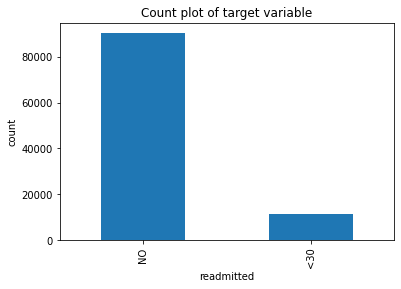

In [ ]:
print(data['readmitted'].value_counts())
data['readmitted'].value_counts().plot(kind='bar',xlabel='readmitted',ylabel='count',title='Count plot of target variable')

1. Out of all patients in dataset 11.15% of patients got readmitted within 30 days and other 88.85% patients didn't get readmitted within 30 days .
2. Given dataset is highly imbalanced.

#  Univariate :

[Text(0.5, 1.0, 'Boxplot : number_diagnoses ')]

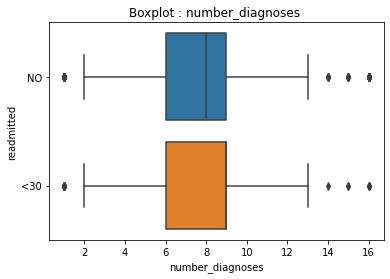

In [ ]:
col = 'number_diagnoses'
sns.boxplot( data=num_data, x=col, y='readmitted').set(title='Boxplot : number_diagnoses ')

1. The box plot shows the median value is closer to the upper quartile.
2. Interquartile range is between 6 to 9.
2. Median value for number of diagnoses is 8.
3. Distribution of number_diagnoses is same for both the values of readmitted.


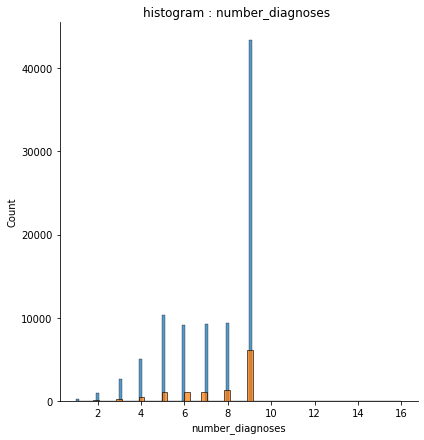

In [ ]:
sns.FacetGrid(num_data , hue='readmitted' ,size=6).map(sns.histplot ,col).set(title='histogram : number_diagnoses ')

The above graph shows that,
  1. Nearly half of the patients have gone through a total of 9 diagnoses.
  2. Very few patients have gone through 1 diagnosis.

[Text(0.5, 1.0, 'Boxplot : num_procedures')]

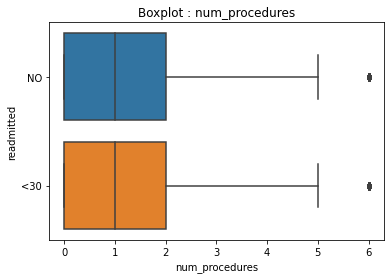

In [ ]:
col = 'num_procedures'
sns.boxplot( data=num_data, x=col, y='readmitted').set(title='Boxplot : num_procedures')

1. The box plot shows the median closer to the lower quartile.The distribution is positively skewed .
2. Interquartile range is between 0 to 2.
3. Median value for number of procedures is 1.
4. Distribution for number of procedures is same for both the values of readmitted .




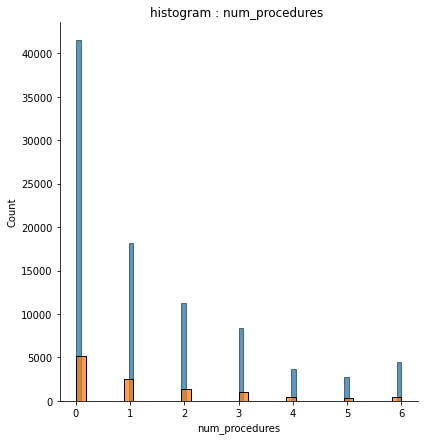

In [ ]:
sns.FacetGrid(num_data , hue='readmitted' ,size=6).map(sns.histplot ,'num_procedures').set(title='histogram : num_procedures ')

The above graph shows that,
  1. Majority of the patients have gone through 0 procedures .
  2. Number of patients decreases as Number of procedures increases.


[Text(0.5, 1.0, 'Boxplot : number_inpatient')]

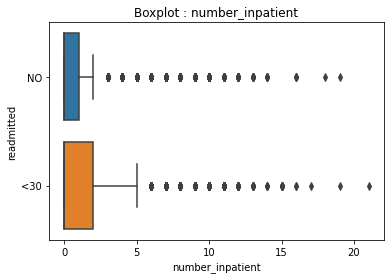

In [ ]:
col = 'number_inpatient'
sns.boxplot( data=num_data, x=col, y='readmitted').set(title='Boxplot : number_inpatient')

1. The box plot shows the median value is closer to the lower quartile.
2. Interquartile range is between 0 to 2 for patients with less then 30 days readmission and for more then 30 days it is 0 to 1.
3. Median value for number of diagnoses is 1.
4. The probability of readmission increases if number of inpatients are more .


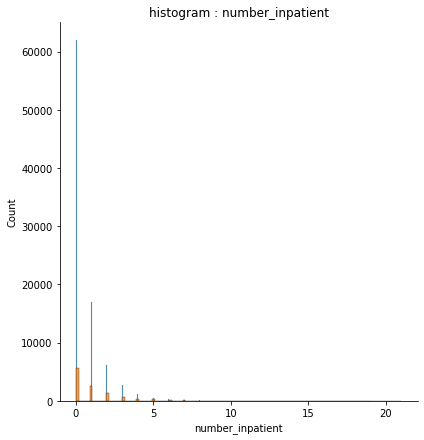

In [ ]:
col = 'number_inpatient'
sns.FacetGrid(num_data , hue='readmitted' ,size=6).map(sns.histplot ,col).set(title=('histogram : '+ col))

1. Majority of the patients have gone through 0 inpatients .
2. Numner of patients decreses as Numner of impatient decreases .


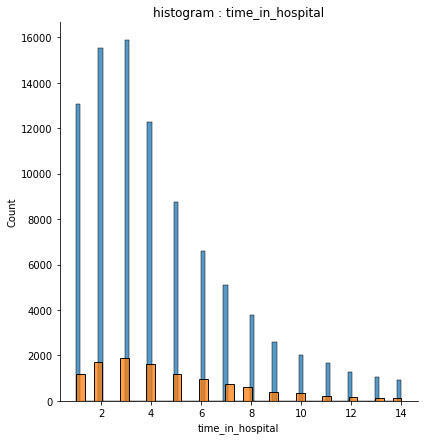

In [ ]:
col='time_in_hospital'
sns.FacetGrid(num_data , hue='readmitted' ,size=6).map(sns.histplot ,col).set(title=('histogram : '+ col))

1. Majority of the patients have spent time in hospital with the value 3 .
2. Distribution is positively skewed.

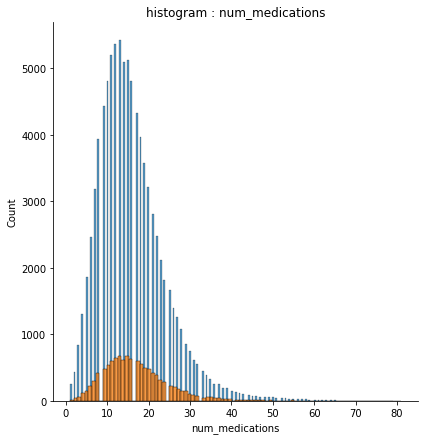

In [ ]:
col = 'num_medications'
sns.FacetGrid(num_data , hue='readmitted' ,size=6).map(sns.histplot ,col).set(title=('histogram : '+ col))

1. Majority of the patients are having number medications between 10 to 20 .
2. The distribution is positively skewed .


[Text(0.5, 1.0, 'Boxplot :num_lab_procedures')]

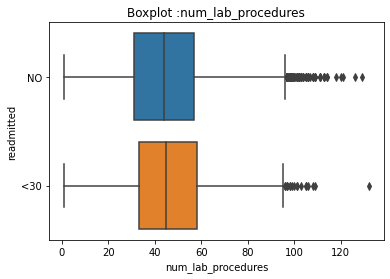

In [ ]:
col = 'num_lab_procedures'
sns.boxplot( data=num_data, x=col, y='readmitted').set(title='Boxplot :' + col)

1. The distribution is Negatively skewed .
2. Median value is 44 .
3. Data contains some outliers 

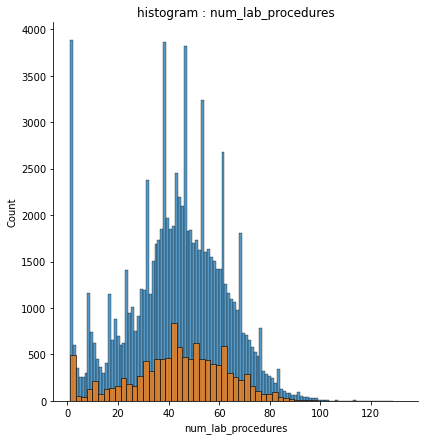

In [ ]:
sns.FacetGrid(num_data , hue='readmitted' ,size=6).map(sns.histplot ,col).set(title=('histogram : '+ col))

1. Majority of the patients are having num_lab_procedures between 35 to 49 . 
2. Also many patients have zero number of lab procedures .

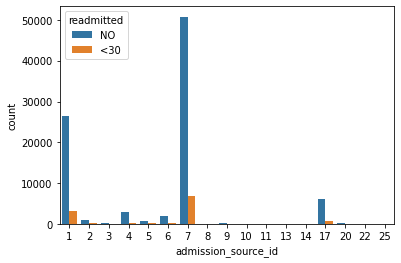

In [ ]:
sns.countplot(data = cat_data , x='admission_source_id' , hue = 'readmitted')

1. Majority of the patients are having admission source id of number 7 .
2. Also many patients have admission source id of number 0 .

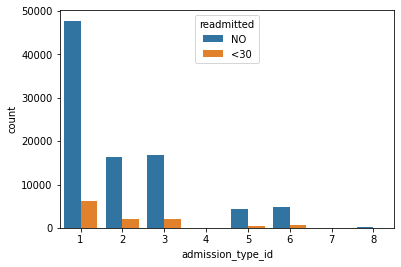

In [ ]:
sns.countplot(data = cat_data , x='admission_type_id' , hue = 'readmitted')

1. Majority of the patients are having admission type id as 1.
2. Also many patients have admission type id as 2 and 3.

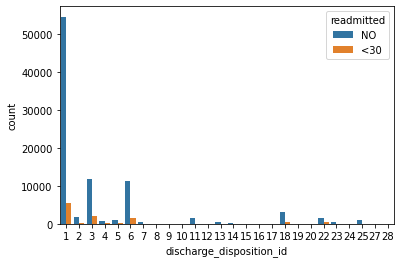

In [ ]:
sns.countplot(data = cat_data , x='discharge_disposition_id' , hue = 'readmitted')

1. Majority of the patients are having discharge disposition id as 1 .
2. Also many patients have discharge disposition id of number 2 and 6 .

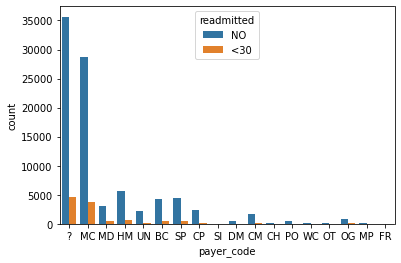

In [ ]:
sns.countplot(data = cat_data , x='payer_code' , hue = 'readmitted')

1. Majority of the patients are having payer code value unknown (?) . 
2. Also many patients have 'MC' payer code .

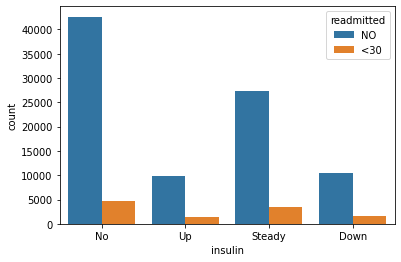

In [ ]:
sns.countplot(data = cat_data , x='insulin' , hue = 'readmitted')

1. Majority of the patients are having insulin value 'NO' .
2. Also many patients have 'Stedy' insulin .

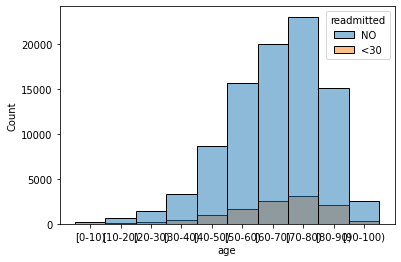

In [ ]:
sns.histplot(data = cat_data , x='age' , hue = 'readmitted')

1. Majority of the patients are having age between 50 to 90 .
2. As age increases number of patients also increases .

#Note :
1. Feature 'medical_specialty' contains 73 values .
2. Categorical features diag_1, diag_2, diag_3 contains more then 700 values . 
3. Ploting all values in single plot is not possible .
so , only ***most frequent values are ploted***.


?                         49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
Speech                        1
SportsMedicine                1
Proctology                    1
Dermatology                   1
Psychiatry-Addictive          1
Name: medical_specialty, Length: 73, dtype: int64
_________________________________________
count table :
readmitted                          <30     NO
medical_specialty                             
?                                  5781  44168
InternalMedicine                   1646  12989
Family/GeneralPractice              883   6557
Emergency/Trauma                    846   6719
Cardiology                          425   4927
Surgery-General                     342   2757
Nephrology                          248   1365
Orthopedics                         151   1249
Psychiatry                          104    750
Radiologist              

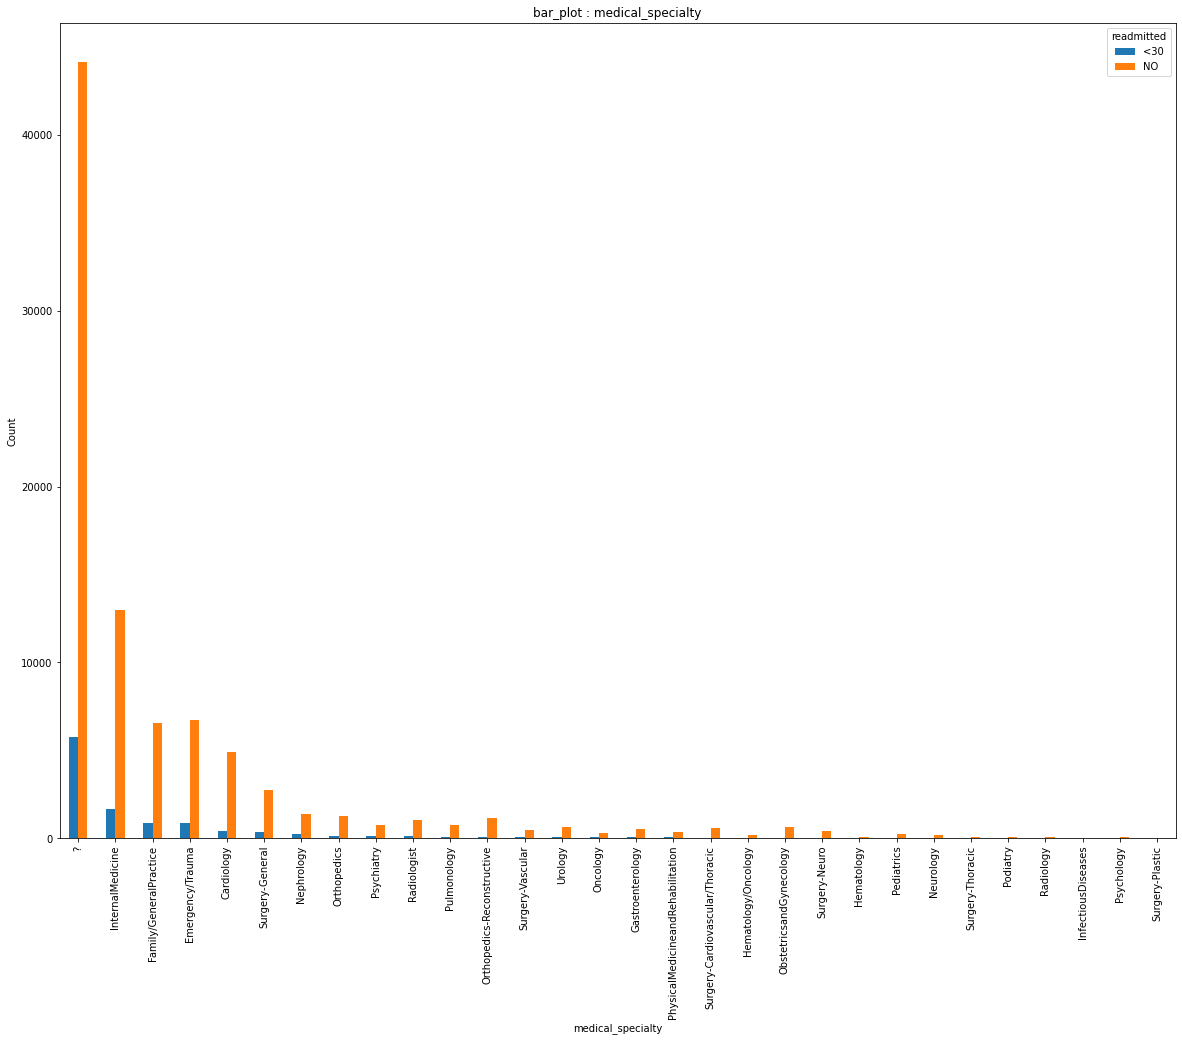

In [ ]:
print(cat_data['medical_specialty'].value_counts())
print('_________________________________________')
ct = pd.crosstab(imp_data['medical_specialty'] , imp_data['readmitted'])
print('count table :')
b = ct['<30'].sort_values(ascending=False)[:30].index
new_ct = ct.loc[list(b)]
print(new_ct)
new_ct.plot(kind='bar',ylabel="Count", xlabel='medical_specialty',figsize=(20,15) ,title = 'bar_plot : medical_specialty')

1. Half of the observations are having missing value as medical_specialty.
2. Many patients are having medical specialty as InternalMedicine, Emergency/Trauma, Family/GeneralPractice
and Cardiology .

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
98        1
698       1
704       1
V07       1
477       1
Name: diag_1, Length: 717, dtype: int64
_________________________________________
count table :
readmitted  <30    NO
diag_1               
428         968  5894
414         595  5986
410         373  3241
434         329  1699
486         314  3194
786         291  3725
491         287  1988
996         264  1703
276         257  1632
427         252  2514
250.6       219   964
715         215  1936
584         202  1318
780         191  1828
38          187  1501
682         183  1859
250.8       179  1501
820         171   911
599         171  1424
250.7       165   706
V57         163  1044
577         142   915
440         133   707
250.13      113   738
518         110  1005
296         103   793
493          98   958
V58          95   133
560          92   784
507          90   520
562          89   900
250.11       88   537
998          87   697
57

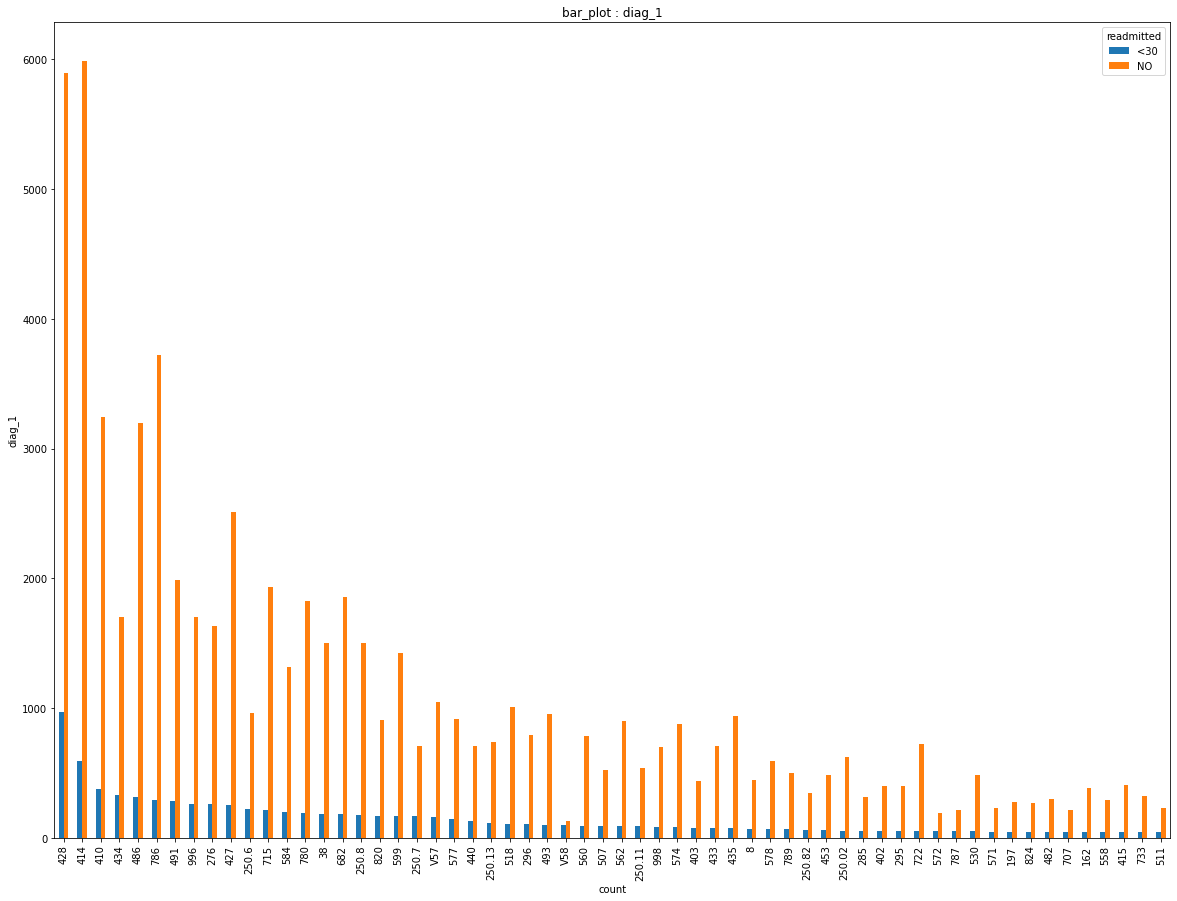

In [ ]:
print(cat_data['diag_1'].value_counts())
print('_________________________________________')
ct = pd.crosstab(imp_data['diag_1'] , imp_data['readmitted'])
print('count table :')
b = ct['<30'].sort_values(ascending=False)[:60].index
new_ct = ct.loc[list(b)]
print(new_ct)
new_ct.plot(kind='bar',ylabel="diag_1", xlabel='count',figsize=(20,15) ,title = 'bar_plot : diag_1')

1. Most frequent diag_1 value is 428 followed by 414, 410 
and 434.
2. This feature contains many outliers.


276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
658        1
V50        1
E938       1
256        1
E813       1
Name: diag_2, Length: 749, dtype: int64
_________________________________________
count table :
readmitted  <30    NO
diag_2               
428         842  5820
276         810  5942
427         563  4473
250         446  5625
403         429  2394
599         371  2917
496         368  2937
707         285  1714
585         272  1599
401         268  3468
411         249  2317
250.02      221  1853
414         220  2430
491         201  1344
250.01      196  1327
682         190  1243
584         190  1459
425         175  1259
780         147  1344
250.6       145   750
486         142  1237
285         141  1379
518         138  1217
424         110   961
413          87   955
440          82   324
785          77   439
493          70   811
996          67   387
511          66   453
571          65   349
305          64   638
410          

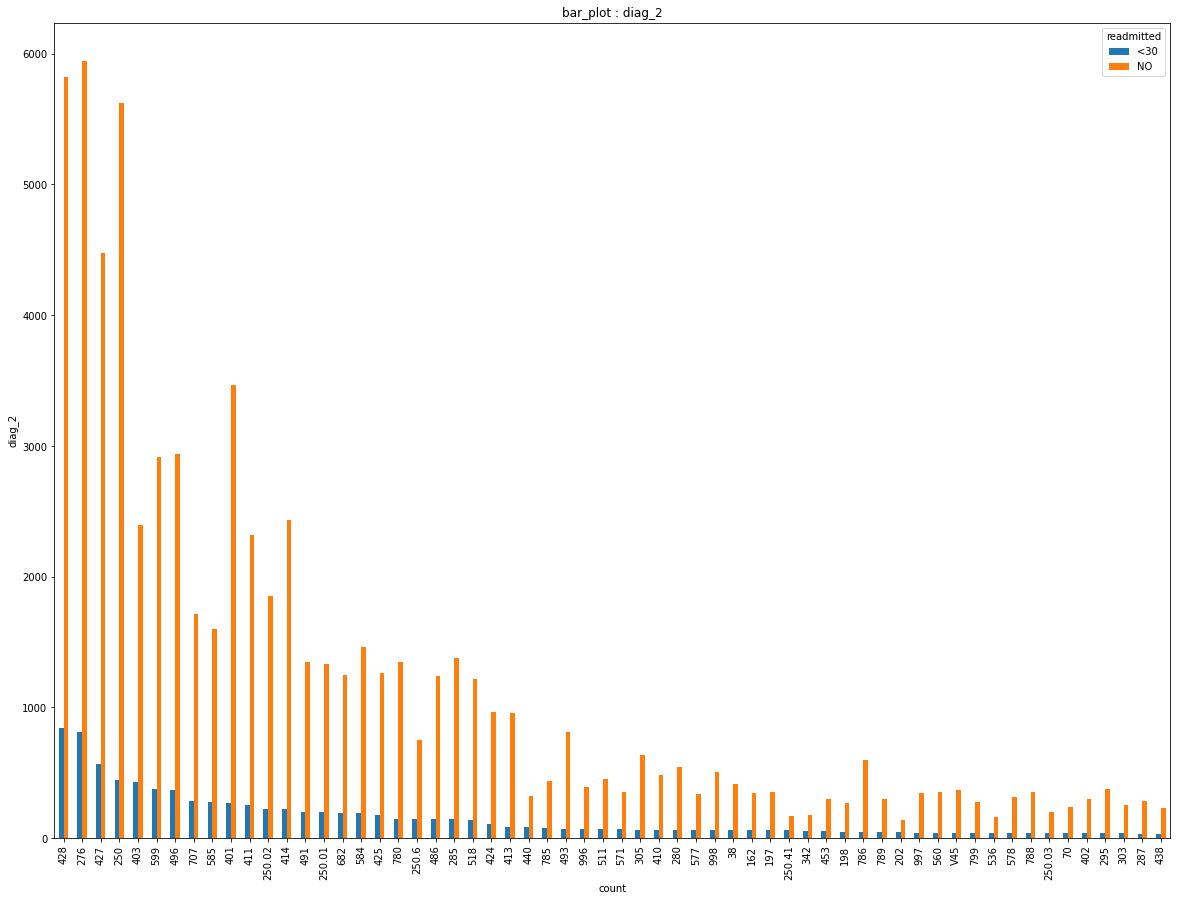

In [ ]:
print(cat_data['diag_2'].value_counts())
print('_________________________________________')
ct = pd.crosstab(imp_data['diag_2'] , imp_data['readmitted'])
print('count table :')
uni = cat_data['diag_2'].unique()
b = ct['<30'].sort_values(ascending=False).index
new_ct = ct.loc[list(b)[:60]]
print(new_ct)
new_ct.plot(kind='bar',ylabel="diag_2", xlabel='count',figsize=(20,15) ,title = 'bar_plot : diag_2')

1. Most frequent diag_2 value is 276 followed by 428, 250
and 427.
2. This feature contains many outliers.
   

250    11555
401     8289
276     5175
428     4577
427     3955
       ...  
952        1
195        1
992        1
944        1
951        1
Name: diag_3, Length: 790, dtype: int64
_________________________________________
count table :
readmitted  <30     NO
diag_3                
250         984  10571
401         688   7601
276         603   4572
428         560   4017
427         459   3496
403         385   1972
496         350   2255
414         338   3326
585         336   1656
599         239   1702
707         202   1158
250.6       192    888
250.02      180   1189
780         149   1185
272         135   1834
V45         132   1257
425         131   1005
285         127   1073
584         127    836
682         113    774
250.01      113    802
424         109    954
518         106    748
?            91   1332
305          80    844
493          74    620
486          74    494
785          72    316
197          68    317
491          67    507
536          66    201
25

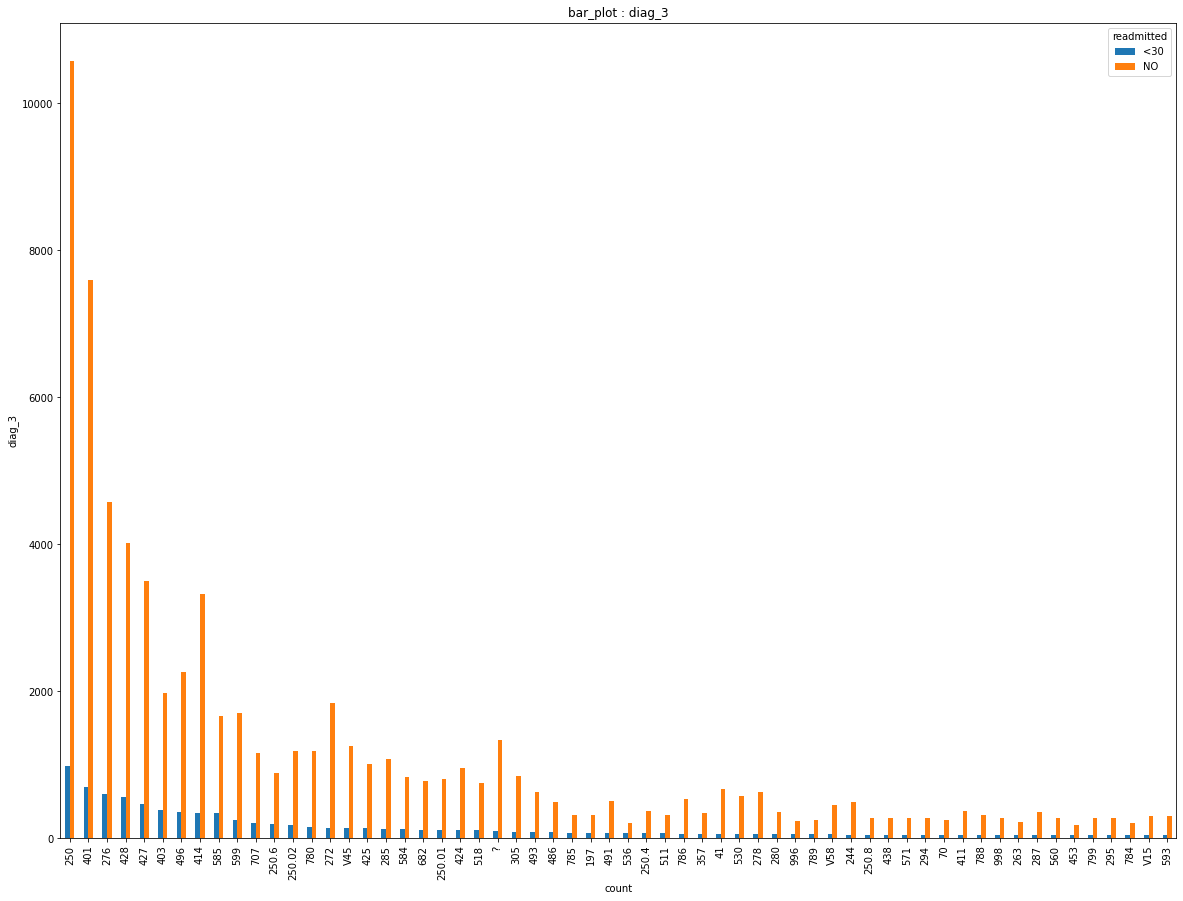

In [ ]:
print(cat_data['diag_3'].value_counts())
print('_________________________________________')
ct = pd.crosstab(imp_data['diag_3'] , imp_data['readmitted'])
print('count table :')
b = ct['<30'].sort_values(ascending=False)[:60].index
new_ct = ct.loc[list(b)]
print(new_ct)
new_ct.plot(kind='bar',ylabel="diag_3", xlabel='count',figsize=(20,15) ,title = 'bar_plot : diag_3')

1. Most frequent diag_2 value is 250 followed by 401, 276
and 428.
2. This feature contains many outliers.


# **NOTE :**

---


1. Dataset is highly imbalanced .Normal count plots will not be able to provide clear visualization .
2. Using Probability value insted of count value for plotting which would give us batter visualization .

In [ ]:
from sklearn.preprocessing import Normalizer
def crosstab_Probability_plot(i):
    ct = pd.crosstab(imp_data[i] , imp_data['readmitted'])
    print('count table :')
    print(ct)
    print('____________________________________________')
    norm_ct  = Normalizer(norm='l1').fit_transform(ct)
    norm_ct = pd.DataFrame(norm_ct*100, columns=ct.columns)
    norm_ct = norm_ct.set_index(ct.index)
    print(' Probability table (row wise) :')
    print(norm_ct)
    if len(ct.index) < 20:
        fg=(8,6)
    else :
        fg=(24,14)  
    norm_ct.plot(kind='bar',ylabel="Probability (%)", xlabel=i,figsize=fg ,title = 'Bar_plot : Probability value of '+i)
    

# Bivariate:

count table :
readmitted   <30     NO
age                    
[0-10)         3    158
[10-20)       40    651
[20-30)      236   1421
[30-40)      424   3351
[40-50)     1027   8658
[50-60)     1668  15588
[60-70)     2502  19981
[70-80)     3069  22999
[80-90)     2078  15119
[90-100)     310   2483
____________________________________________
 Probability table (row wise) :
readmitted        <30         NO
age                             
[0-10)       1.863354  98.136646
[10-20)      5.788712  94.211288
[20-30)     14.242607  85.757393
[30-40)     11.231788  88.768212
[40-50)     10.604027  89.395973
[50-60)      9.666203  90.333797
[60-70)     11.128408  88.871592
[70-80)     11.773055  88.226945
[80-90)     12.083503  87.916497
[90-100)    11.099177  88.900823


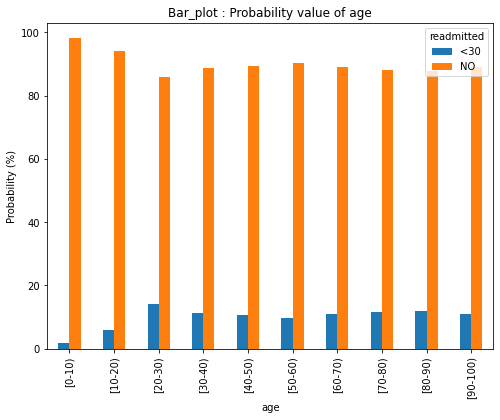

In [ ]:
crosstab_Probability_plot('age')

1. Patients with age between 0 to 10 have lower chance of readmission with in 30 days.


count table :
readmitted       <30    NO
num_medications           
1                 11   251
2                 39   431
3                 65   835
4                114  1303
5                150  1867
...              ...   ...
72                 3     0
74                 0     1
75                 0     2
79                 0     1
81                 1     0

[75 rows x 2 columns]
____________________________________________
 Probability table (row wise) :
readmitted              <30          NO
num_medications                        
1                  4.198473   95.801527
2                  8.297872   91.702128
3                  7.222222   92.777778
4                  8.045166   91.954834
5                  7.436787   92.563213
...                     ...         ...
72               100.000000    0.000000
74                 0.000000  100.000000
75                 0.000000  100.000000
79                 0.000000  100.000000
81               100.000000    0.000000

[75 rows x 2 c

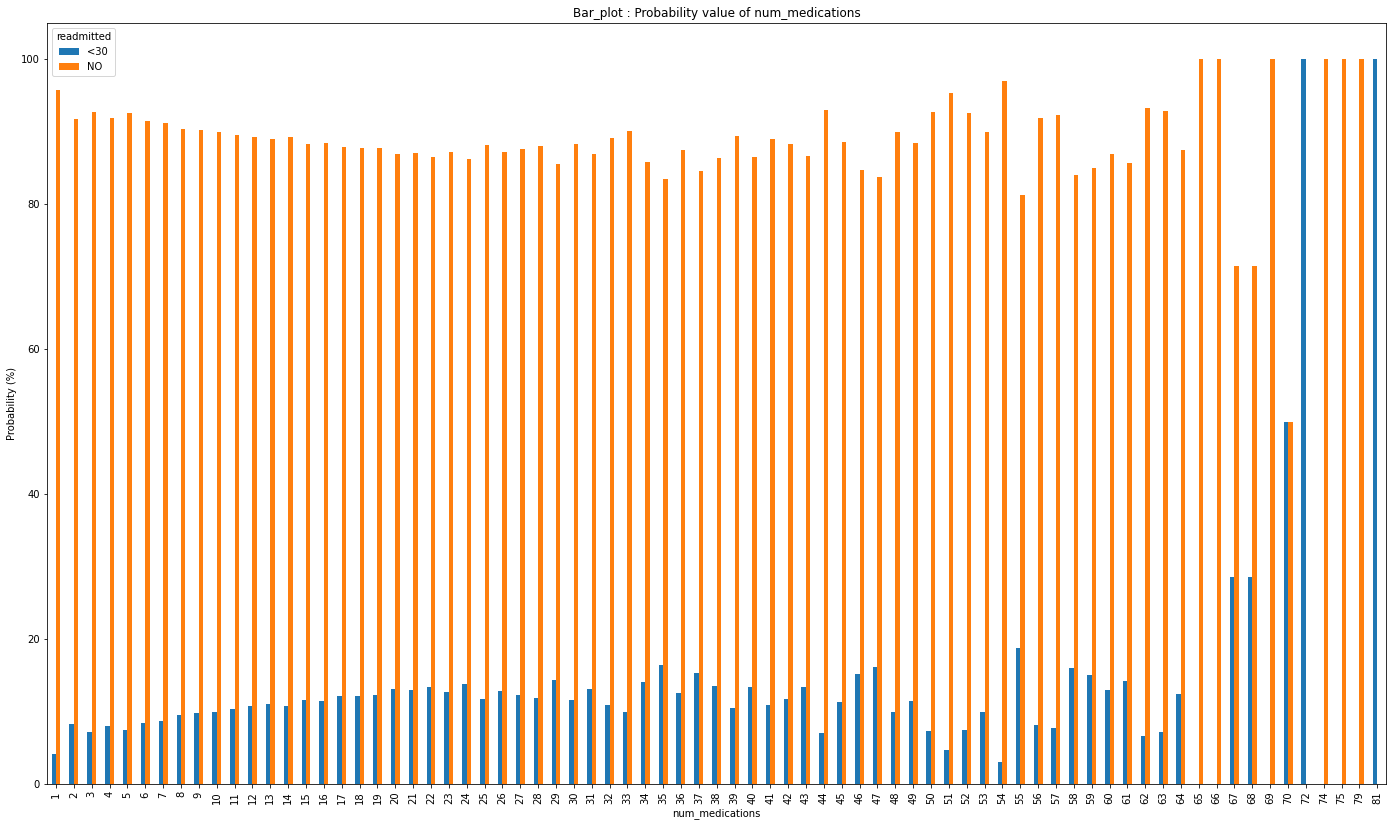

In [ ]:
crosstab_Probability_plot('num_medications')

1. Chances of readmission within 30 days increases as number of medications,  increases.
 

count table :
readmitted         <30     NO
number_inpatient             
0                 5706  61924
1                 2523  16998
2                 1319   6247
3                  692   2719
4                  383   1239
5                  255    557
6                  166    314
7                   95    173
8                   67     84
9                   47     64
10                  26     35
11                  33     16
12                  17     17
13                  10     10
14                   4      6
15                   9      0
16                   2      4
17                   1      0
18                   0      1
19                   1      1
21                   1      0
____________________________________________
 Probability table (row wise) :
readmitted               <30          NO
number_inpatient                        
0                   8.437084   91.562916
1                  12.924543   87.075457
2                  17.433254   82.566746
3             

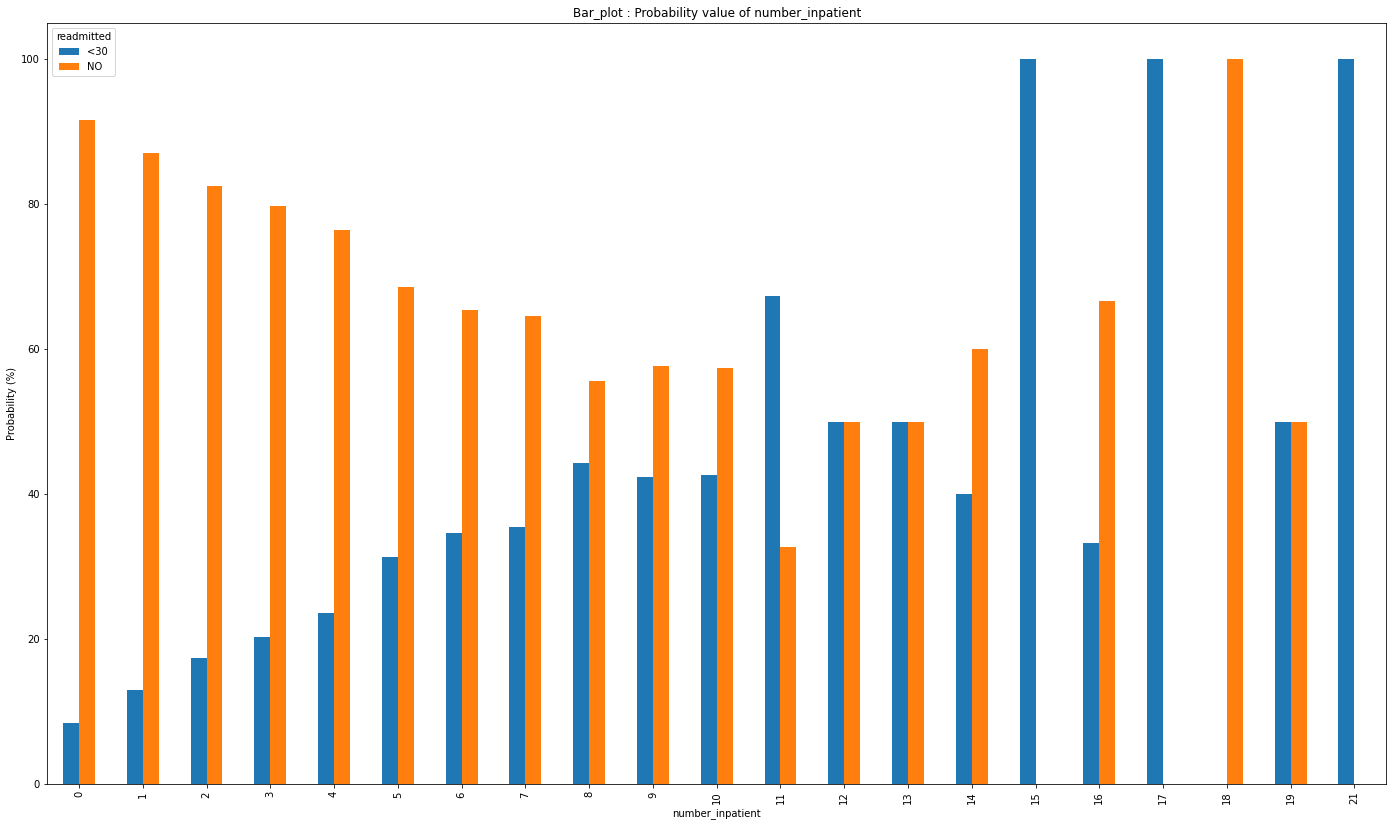

In [ ]:
crosstab_Probability_plot('number_inpatient')

Chances of readmission within 30 days increases as number_inpatient increases.


count table :
readmitted   <30     NO
payer_code             
?           4627  35629
BC           426   4229
CH            13    133
CM           198   1739
CP           214   2319
DM            64    485
FR             0      1
HM           644   5630
MC          3810  28629
MD           416   3116
MP             9     70
OG           136    897
OT             7     88
PO            44    548
SI             7     48
SP           510   4497
UN           227   2221
WC             5    130
____________________________________________
 Probability table (row wise) :
readmitted        <30          NO
payer_code                       
?           11.493939   88.506061
BC           9.151450   90.848550
CH           8.904110   91.095890
CM          10.221993   89.778007
CP           8.448480   91.551520
DM          11.657559   88.342441
FR           0.000000  100.000000
HM          10.264584   89.735416
MC          11.745122   88.254878
MD          11.778029   88.221971
MP          11.392405

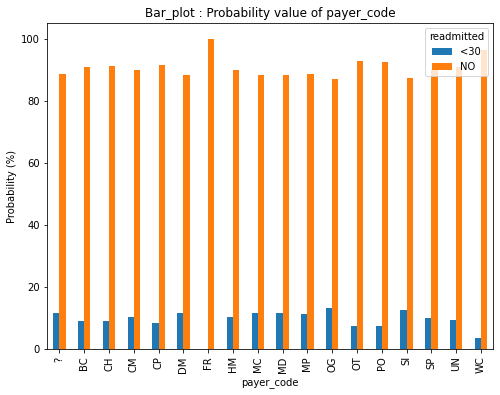

In [ ]:
crosstab_Probability_plot('payer_code')

1. Chances of readmission within 30 days is heigest when payer code is OG .
2. Chances of readmission within 30 days is lowest when payer code is FR .


count table :
readmitted         <30     NO
number_diagnoses             
1                   13    206
2                   62    961
3                  209   2626
4                  457   5080
5                 1043  10350
6                 1058   9103
7                 1119   9274
8                 1254   9362
9                 6125  43349
10                   3     14
11                   3      8
12                   1      8
13                   3     13
14                   1      6
15                   2      8
16                   4     41
____________________________________________
 Probability table (row wise) :
readmitted              <30         NO
number_diagnoses                      
1                  5.936073  94.063927
2                  6.060606  93.939394
3                  7.372134  92.627866
4                  8.253567  91.746433
5                  9.154744  90.845256
6                 10.412361  89.587639
7                 10.766862  89.233138
8                 

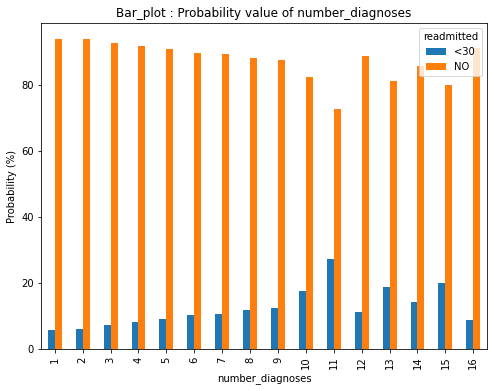

In [ ]:
crosstab_Probability_plot('number_diagnoses')

Chances of readmission within 30 days increases as number_diagnoses increases.

 

count table :
readmitted   <30     NO
insulin                
Down        1698  10520
No          4756  42627
Steady      3433  27416
Up          1470   9846
____________________________________________
 Probability table (row wise) :
readmitted        <30         NO
insulin                         
Down        13.897528  86.102472
No          10.037355  89.962645
Steady      11.128400  88.871600
Up          12.990456  87.009544


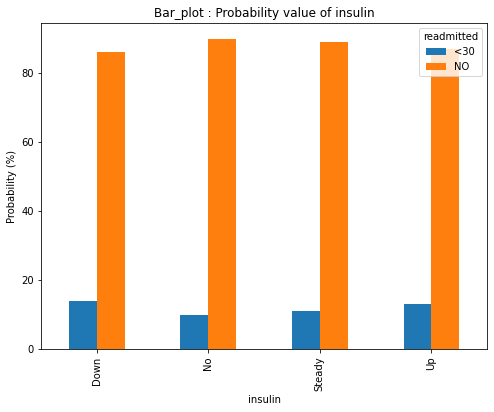

In [ ]:
crosstab_Probability_plot('insulin')

1. Patients with insulin value of Down and Up have higher chance of readmission with in 30 days.
2. Patients with insulin value of No have lowest chnace of readmission with in 30 days followed by Steady .
 

count table :
readmitted                 <30     NO
discharge_disposition_id             
1                         5602  54632
2                          342   1786
3                         2046  11908
4                          104    711
5                          247    937
6                         1638  11264
7                           90    533
8                           15     93
9                            9     12
10                           0      6
11                           0   1642
12                           2      1
13                          19    380
14                          24    348
15                          28     35
16                           0     11
17                           0     14
18                         459   3232
19                           0      8
20                           0      2
22                         552   1441
23                          30    382
24                           7     41
25                          92    89

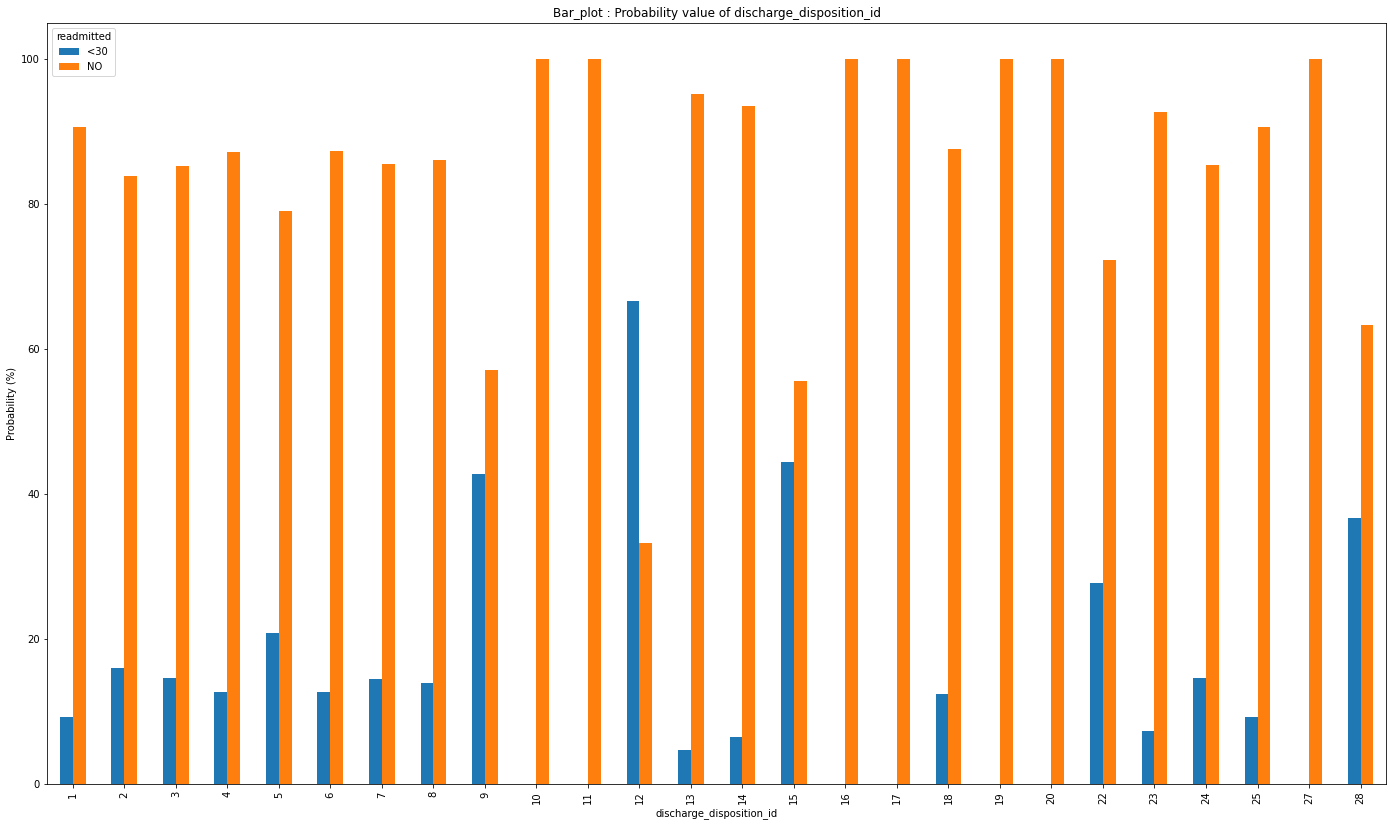

In [ ]:
crosstab_Probability_plot('discharge_disposition_id')

1. Patients with discharge_disposition_id of 12, 9 and 15 have higher chance of readmission with in 30 days.
2. Patients with discharge_disposition_id of 10, 11, 16, 17, 19, 20 and 27 have very low chance of readmission with in 30 days.


count table :
readmitted                          <30     NO
medical_specialty                             
?                                  5781  44168
InternalMedicine                   1646  12989
Family/GeneralPractice              883   6557
Emergency/Trauma                    846   6719
Cardiology                          425   4927
Surgery-General                     342   2757
Nephrology                          248   1365
Orthopedics                         151   1249
Psychiatry                          104    750
Radiologist                         103   1037
Pulmonology                          96    775
Orthopedics-Reconstructive           92   1141
Surgery-Vascular                     74    459
Urology                              68    617
Oncology                             66    282
Gastroenterology                     62    502
PhysicalMedicineandRehabilitation    60    331
Surgery-Cardiovascular/Thoracic      43    609
Hematology/Oncology                  40    167

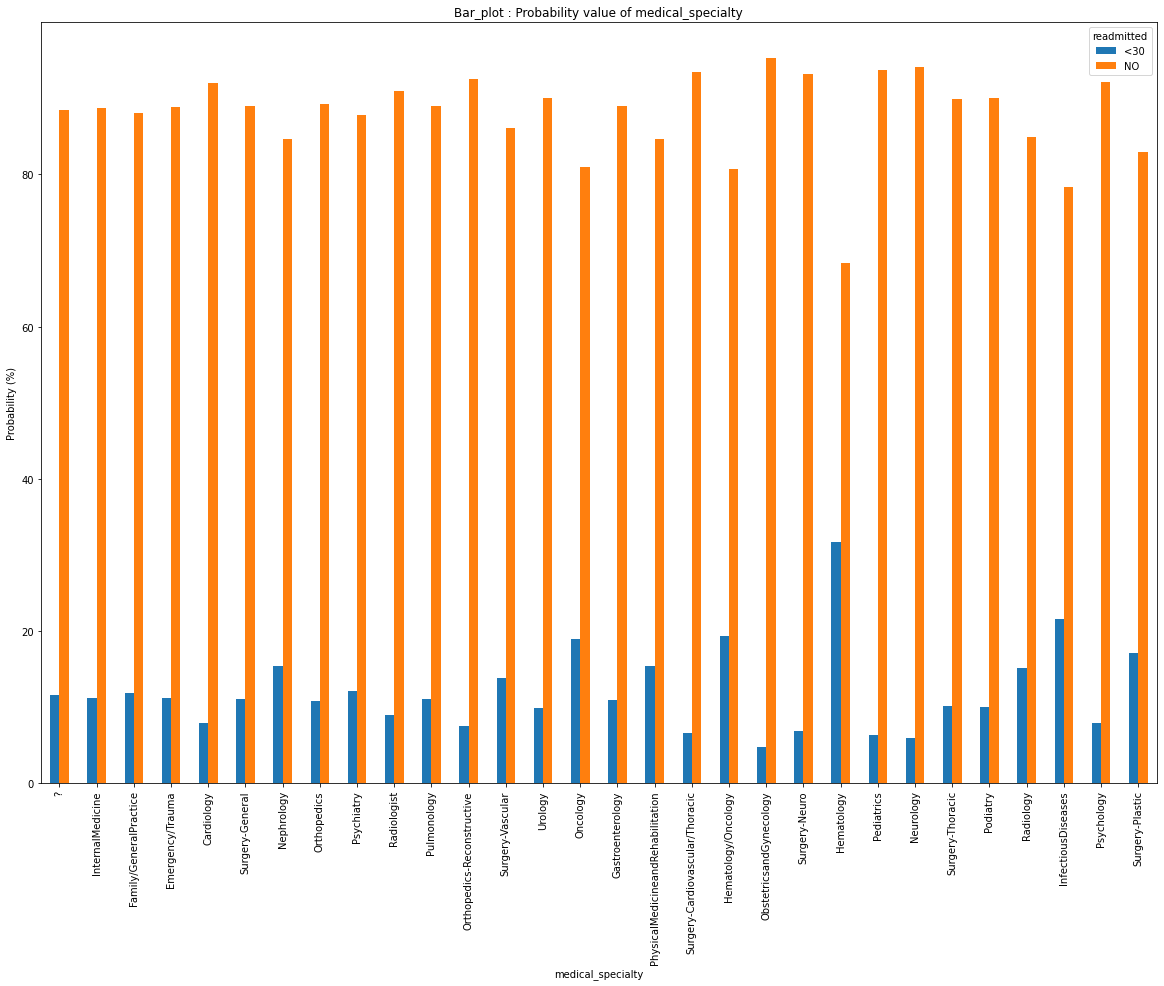

In [ ]:
ct = pd.crosstab(imp_data['medical_specialty'] , imp_data['readmitted'])
print('count table :')
b = ct['<30'].sort_values(ascending=False)[:30].index
new_ct = ct.loc[list(b)]
print(new_ct)
print('____________________________________________')
norm_ct  = Normalizer(norm='l1').fit_transform(new_ct)
norm_ct = pd.DataFrame(norm_ct*100, columns=new_ct.columns)
norm_ct = norm_ct.set_index(new_ct.index)
print('Probability  table (row wise) :')
print(norm_ct) 
norm_ct.plot(kind='bar',ylabel="Probability (%)", xlabel='medical_specialty',figsize=(20,14) ,title = 'Bar_plot : Probability value of medical_specialty')

1. Patients with medical specialty as Hematology have highest chance of readmission within 30 days.
2. Patients with medical specialty as Oncology have higher chance of readmission with in 30 days.
3. Patients with medical specialty as Hematology/ObstetricsandGynecology have lowest chance of readmission with in 30 days .
4. Patients with medical specialty as Pediatrics and Neurology have lower chance of readmission with in 30 days.


count table :
readmitted  <30    NO
diag_1               
428         968  5894
414         595  5986
410         373  3241
434         329  1699
486         314  3194
786         291  3725
491         287  1988
996         264  1703
276         257  1632
427         252  2514
250.6       219   964
715         215  1936
584         202  1318
780         191  1828
38          187  1501
682         183  1859
250.8       179  1501
820         171   911
599         171  1424
250.7       165   706
V57         163  1044
577         142   915
440         133   707
250.13      113   738
518         110  1005
296         103   793
493          98   958
V58          95   133
560          92   784
507          90   520
562          89   900
250.11       88   537
998          87   697
574          84   881
403          79   434
433          78   711
435          78   938
8            71   444
578          71   592
789          65   496
250.82       63   349
453          60   486
250.02       53   

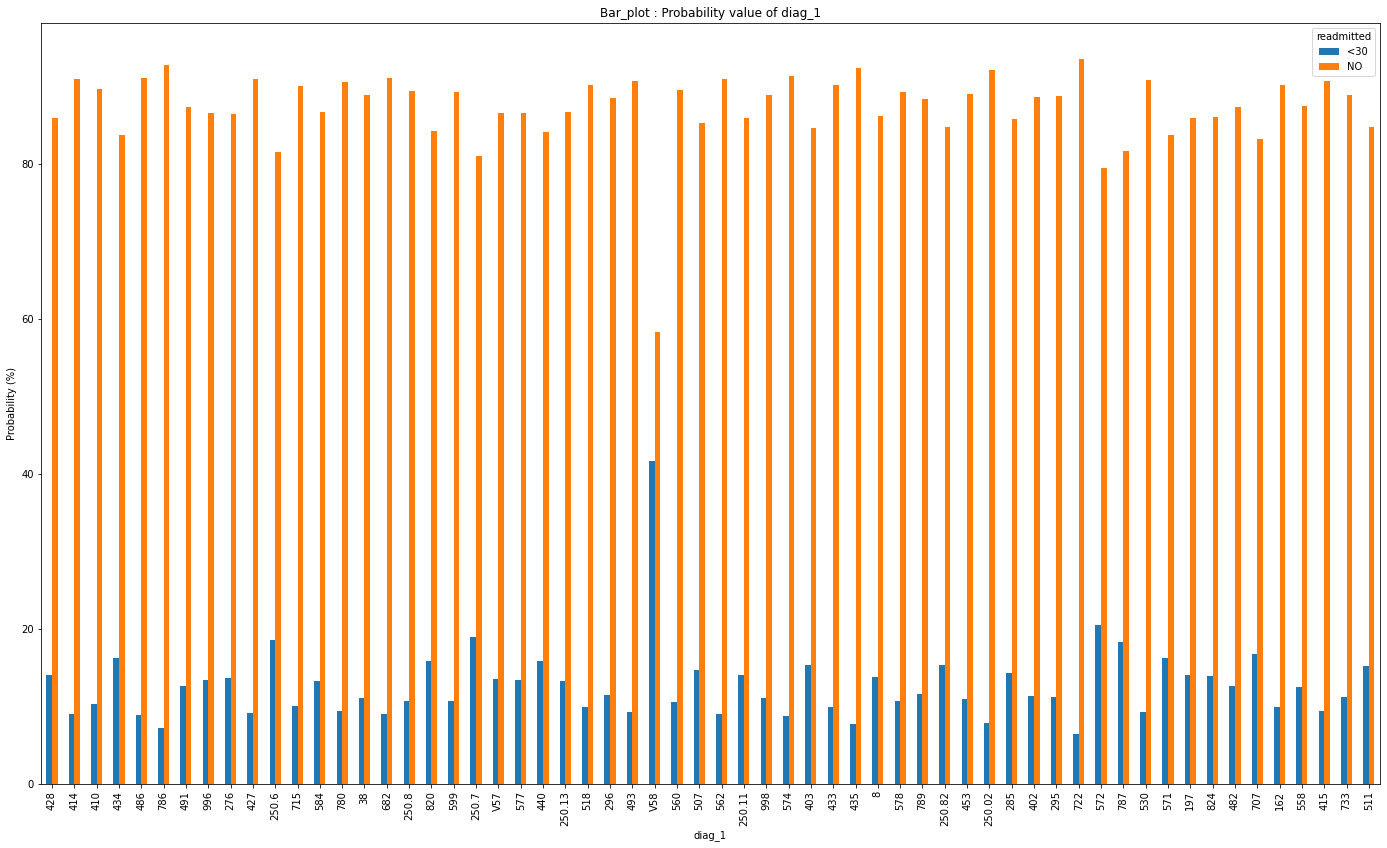

In [ ]:
ct = pd.crosstab(imp_data['diag_1'] , imp_data['readmitted'])
print('count table :')
b = ct['<30'].sort_values(ascending=False)[:60].index
new_ct = ct.loc[list(b)]
print(new_ct)
print('____________________________________________')
norm_ct  = Normalizer(norm='l1').fit_transform(new_ct)
norm_ct = pd.DataFrame(norm_ct*100, columns=new_ct.columns)
norm_ct = norm_ct.set_index(new_ct.index)
print('Probability  table (row wise) :')
print(norm_ct) 
norm_ct.plot(kind='bar',ylabel="Probability (%)", xlabel='diag_1',figsize=(24,14) ,title = 'Bar_plot : Probability value of diag_1')


1. Patients with **V58 as diag_1 value have the highest chance of readmission** within 30 days.
2. Patients with **571, 572 and 434 as diag_1 value have higher chance of readmission** within 30 days.
3. Patients with **722 as diag_1 value have the lowest chance of readmission** within 30 days.
4. Patients with **435 and 786 as diag_1 value have lower chance of readmission** within 30 days.



count table :
readmitted  <30    NO
diag_2               
428         842  5820
276         810  5942
427         563  4473
250         446  5625
403         429  2394
599         371  2917
496         368  2937
707         285  1714
585         272  1599
401         268  3468
411         249  2317
250.02      221  1853
414         220  2430
491         201  1344
250.01      196  1327
682         190  1243
584         190  1459
425         175  1259
780         147  1344
250.6       145   750
486         142  1237
285         141  1379
518         138  1217
424         110   961
413          87   955
440          82   324
785          77   439
493          70   811
996          67   387
511          66   453
571          65   349
305          64   638
410          64   485
280          64   542
577          64   337
998          63   508
38           61   414
162          58   343
197          57   353
250.41       57   171
342          51   172
453          50   296
198          49   

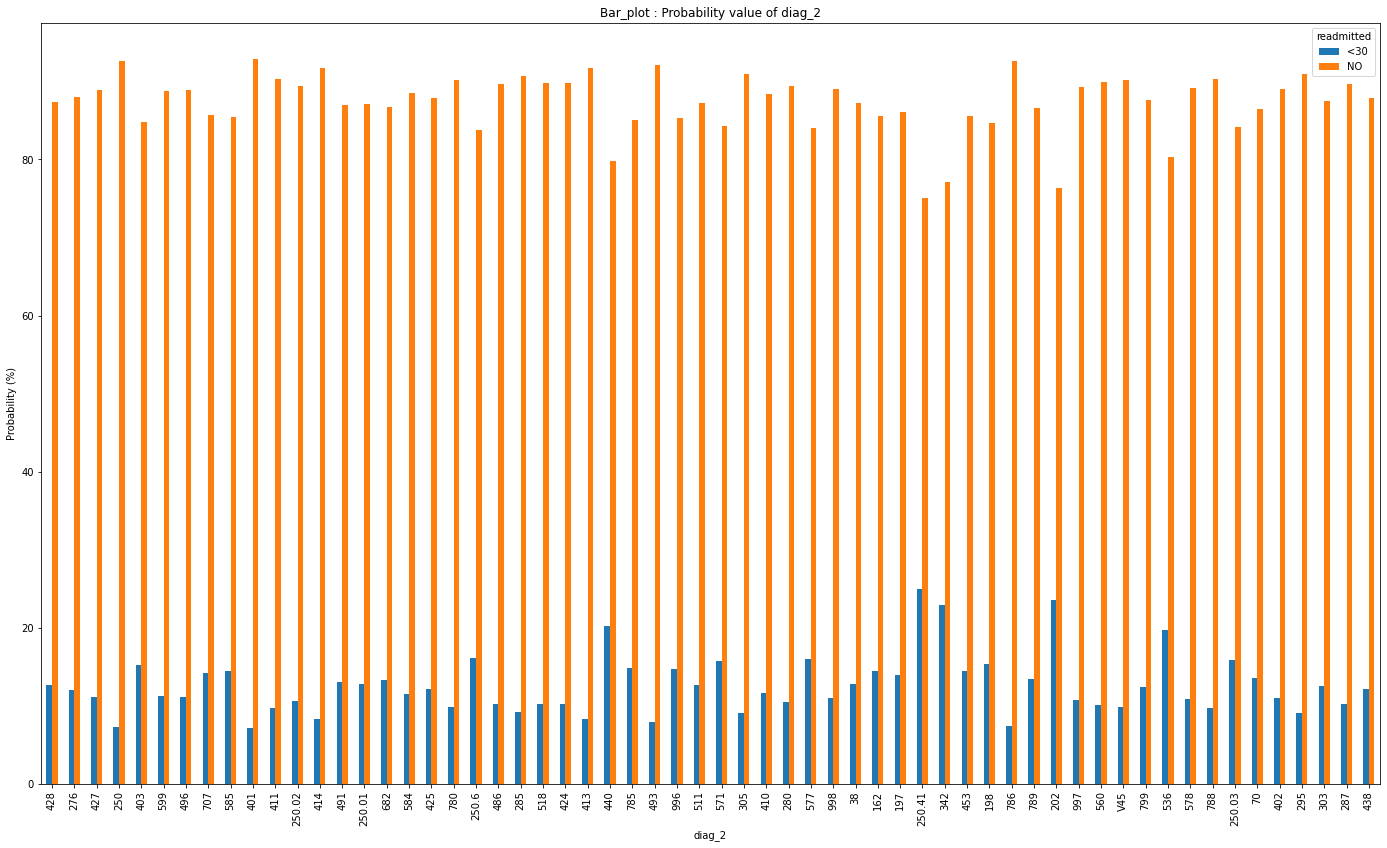

In [ ]:
ct = pd.crosstab(imp_data['diag_2'] , imp_data['readmitted'])
print('count table :')
b = ct['<30'].sort_values(ascending=False)[:60].index
new_ct = ct.loc[list(b)]
print(new_ct)
print('____________________________________________')
norm_ct  = Normalizer(norm='l1').fit_transform(new_ct)
norm_ct = pd.DataFrame(norm_ct*100, columns=new_ct.columns)
norm_ct = norm_ct.set_index(new_ct.index)
print('Probability table (row wise) :')
print(norm_ct) 
norm_ct.plot(kind='bar',ylabel="Probability (%)", xlabel='diag_2',figsize=(24,14) ,title = 'Bar_plot : Probability value of diag_2')


1. Patients with **250.41 as diag_2 value have the highest chance of readmission** within 30 days.
2. Patients with **342, 202 and 440 as diag_2 value have higher chance of readmission** within 30 days.
3. Patients with **401 as diag_2 value have the lowest chance of readmission** within 30 days.
4. Patients with **250, 786 and 493 as diag_2 value have lower chance of readmission** within 30 days.

count table :
readmitted  <30     NO
diag_3                
250         984  10571
401         688   7601
276         603   4572
428         560   4017
427         459   3496
403         385   1972
496         350   2255
414         338   3326
585         336   1656
599         239   1702
707         202   1158
250.6       192    888
250.02      180   1189
780         149   1185
272         135   1834
V45         132   1257
425         131   1005
285         127   1073
584         127    836
682         113    774
250.01      113    802
424         109    954
518         106    748
?            91   1332
305          80    844
493          74    620
486          74    494
785          72    316
197          68    317
491          67    507
536          66    201
250.4        64    365
511          63    317
786          60    524
357          59    335
41           58    669
530          55    570
278          51    629
280          51    347
996          48    233
789          48    2

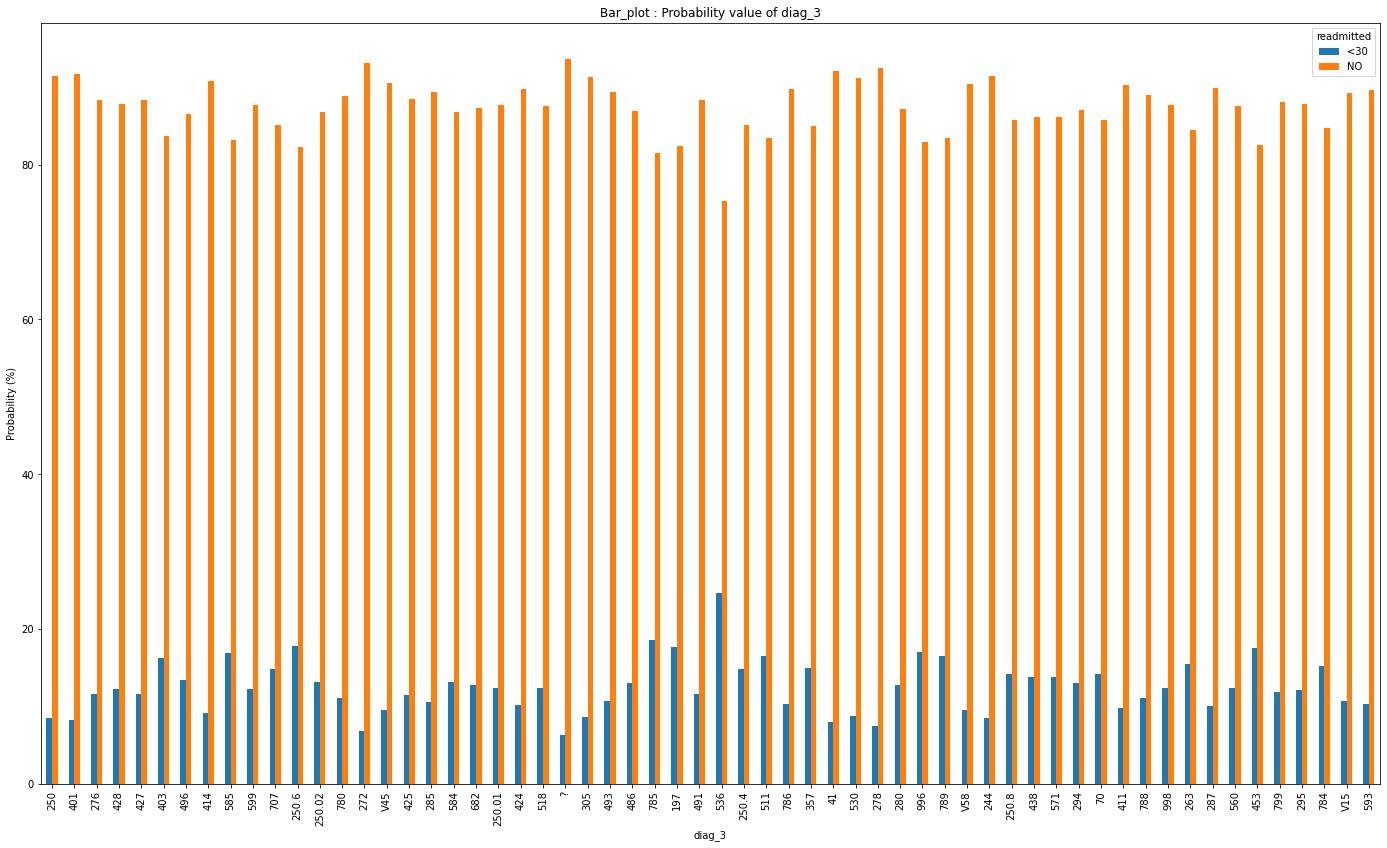

In [ ]:
ct = pd.crosstab(imp_data['diag_3'] , imp_data['readmitted'])
print('count table :')
b = ct['<30'].sort_values(ascending=False)[:60].index
new_ct = ct.loc[list(b)]
print(new_ct)
print('____________________________________________')
norm_ct  = Normalizer(norm='l1').fit_transform(new_ct)
norm_ct = pd.DataFrame(norm_ct*100, columns=new_ct.columns)
norm_ct = norm_ct.set_index(new_ct.index)
print('Probability  table (row wise) :')
print(norm_ct) 
norm_ct.plot(kind='bar',ylabel="Probability (%)", xlabel='diag_3',figsize=(24,14) ,title = 'Bar_plot : Probability value of diag_3')
 

1. Patients with **536 as diag_3 value have the highest chance of readmission** within 30 days.
2. Patients with **785 and 197 as diag_3 value have higher chance of readmission** within 30 days.
3. Patients with **272 as diag_3 value have the lowest chance of readmission** within 30 days.
4. Patients with **278 and 41 as diag_3 value have lower chance of readmission** within 30 days.



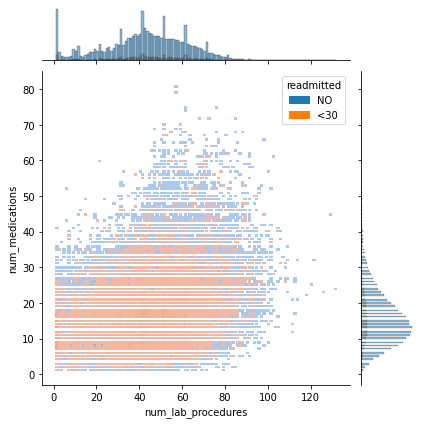

In [ ]:
sns.jointplot(x = 'num_lab_procedures', y = 'num_medications', hue =  'readmitted' , kind = "hist", data =num_data)

1. Above plot shows the relationship between the number of medications and number of lab procedures to predict readmission within 30 days.
2. Here lower to middle region is red coloured.
3. In this plot red region has higher chances to readmission within 30 days.
4. If number of medications is in the range of 0-40 and number of lab procedures  is in the range of 0-90 then chances of readmission within 30 days is higher.


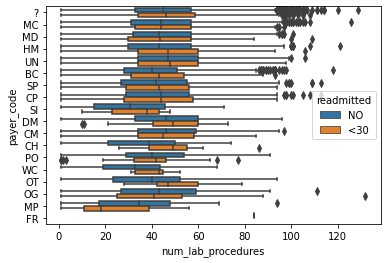

In [ ]:
sns.boxplot(x='num_lab_procedures', y='payer_code' , hue ='readmitted',data=imp_data)

1. Patients with payer_code as OT, WC, OH, DM, BC and with higher number of lab procedures have higher chance of readmission within 30 days.
2. Patients with payer_code as MP, OG and with higher number of lab procedures have lower chance of readmission within 30 days.

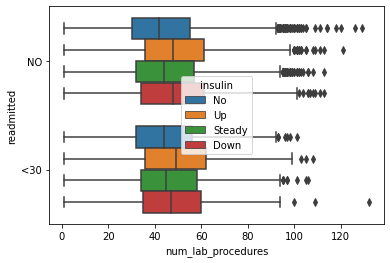

In [ ]:
sns.boxplot(x='num_lab_procedures', hue='insulin' , y ='readmitted',data=imp_data)

1. Patients with insulin value as No and with higher value of number of lab procedures have higher chance of readmission within 30 days.
2. Patients with insulin value as Up and with higher value of number of lab procedures have higher chance of readmission within 30 days.


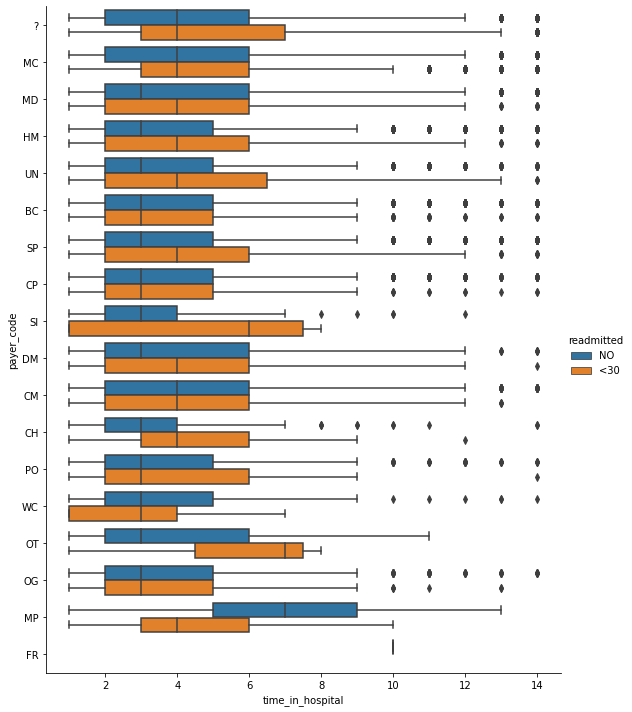

In [ ]:
sns.catplot(x='time_in_hospital' , y='payer_code' , hue ='readmitted',data=imp_data, kind="box",height=10, aspect=0.8)

1. Patients have higher chance of readmission within 30 days ,
  if payer_codes are SP, SI, OH, OT and value of time in hospital is high.
2. Patients have lower chance of readmission within 30 days ,
  if payer_codes is MP and value of time in hospital is high.


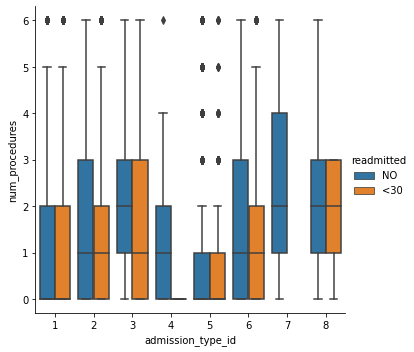

In [ ]:
sns.catplot(x='admission_type_id' , y='num_procedures' , hue ='readmitted',data=imp_data, kind="box")

1. Patients with admission_type_id as 3 and with higher number of procedures have lower chance of readmission within 30 days.


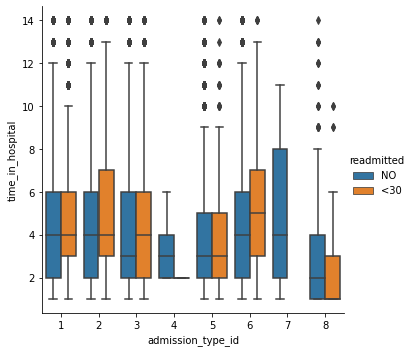

In [ ]:
sns.catplot(x='admission_type_id' , y='time_in_hospital' , hue ='readmitted',data=imp_data, kind="box")

1. Patients have higher chance of readmission within 30 days ,
  if admission_type_id is 6 and value of time in hospital is high.
2. Patients have lower chance of readmission within 30 days ,
  if admission_type_id's are 4, 7 and value of time in hospital is high.


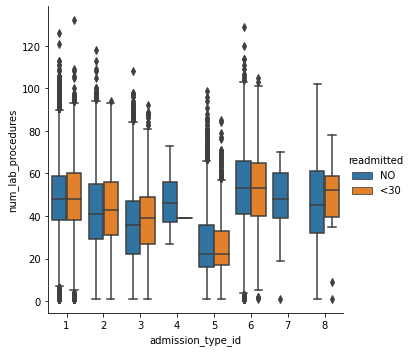

In [ ]:
sns.catplot(x='admission_type_id' , y='num_lab_procedures' , hue ='readmitted',data=imp_data, kind="box")

1. Patients have higher chance of readmission within 30 days ,
  if admission_type_id's are 1, 2, 3, 6, 8 and value of num_lab_procedures is high.
2. Patients have lower chance of readmission within 30 days ,
  if admission_type_id's are 4, 7 and value of num_lab_procedures is high.

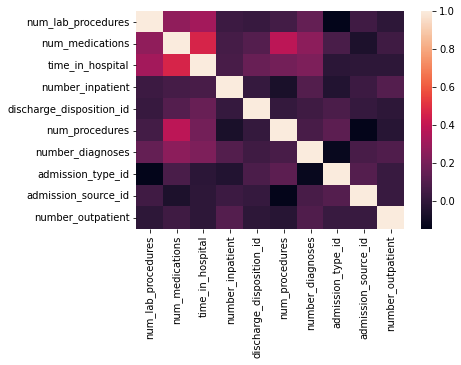

In [ ]:
d=imp_data.drop(['readmitted'],axis=1)
sns.heatmap(d.corr())



Above plot shows correlation between numerical features :

  1. Time in hospsital is correlated with number of medications.
  2. Time in hospsital is also correlated to some extent with number of lab procedures.
  3. Number of medications is correlated with number of procedures.

# FINAL CONCLUSION :

1. Time in hospsital is correlated with number of medications, number of lab procedures and number of procedures.
2. Chances of readmission within 30 days increases as age, number_medications, number_inpatient and number_diagnoses increases.
3. Chances of readmission within 30 days is heigest when payer code is OG and lower when lowest for FR.
4. Chances of readmission within 30 days is ,
  
  * higher when medical specialtys are Hematology and Oncology

  * lower when medical specialtys are Hematology/ObstetricsandGynecology and Pediatrics

5. Chances of readmission within 30 days is higher if,
    * diag_1 values are V58, 571 and 572
    * diag_2 values are 50.41, 342 and 202
    * diag_3 values are 536, 785 and 197
6. Chances of readmission within 30 days is lower if,
      * diag_1 values are  722, 435 and 786
      * diag_2 values are 401, 250 and 786
      * diag_3 values are 272, 278 and 41



